# ***실습 5-1 : Modern CNN***

## ***Import Module***

In [1]:
%tensorflow_version 2.x

import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPool2D, MaxPool1D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import Model

print("Module Loaded.")
print("TensorFlow Version :{}".format(tf.__version__))

TensorFlow 2.x selected.
Module Loaded.
TensorFlow Version :2.0.0


In [0]:
# reset of notebook state
tf.keras.backend.clear_session() 

## ***DataSet***

### *Load*

In [3]:
#data_set = tf.keras.datasets.mnist
#data_set = tf.keras.datasets.fashion_mnist
data_set = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = data_set.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

170500096/170498071 [==============================] - 6s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### *Preprocessing*

In [4]:
# Add a channels dimension for MNIST dataset: (28,28)
#x_train = x_train[..., tf.newaxis]
#x_test = x_test[..., tf.newaxis]

# Converts class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

## ***Model***

### *Define*

### Model_A define: Dropout 사용 model

In [5]:
def model_cnn_basic():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # Dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_basic = model_cnn_basic()

model_basic.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [6]:
def model_cnn_dropout():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3)))
  model.add(Dropout(rate=0.2))                          #  DO1
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Dropout(rate=0.2))                          # DO2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu'))
  model.add(Dropout(rate=0.2))                           # DO3
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_DO = model_cnn_dropout()

model_DO.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)        

### Model_B define: Batch Normalization 사용 model

In [7]:
def model_cnn_batchnormal():
  model = tf.keras.models.Sequential()
  # conv 1
  model.add(Conv2D(64,3,padding='same',activation='relu',input_shape=(32,32,3))) 
  model.add(BatchNormalization())             # BN1
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 2
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(Conv2D(128, 3, padding='same', activation='relu'))
  model.add(BatchNormalization())             # BN2
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # conv 3
  model.add(Conv2D(256, 3, padding='same', activation='relu')) 
  model.add(BatchNormalization())             # BN3
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  # dense layers
  model.add(Flatten(name='flatten'))
  model.add(Dense(1000, activation='relu',name='dense_256'))
  model.add(Dense(10, activation='softmax', name='dense_10'))

  return model

model_BN=model_cnn_batchnormal()

model_BN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)        

### *Compile*

In [0]:
model_basic.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
model_DO.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
model_BN.compile(optimizer='adam',
              #loss='sparse_categorical_crossentropy',
              loss='categorical_crossentropy',
              metrics=['acc'])

### *Fit*

Epoch 20/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0276 - accuracy: 0.9911
CPU times: user 1min 7s, sys: 30.2 s, total: 1min 38s   
Wall time: 1min 40
(@Notebook Setting/GPU)

In [0]:
batch_n = 512
epoch_n = 30

In [12]:
%%time
history_basic = model_basic.fit(x_train, y_train, 
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 156us/sample - loss: 1.6576 - acc: 0.3941 - val_loss: 1.2957 - val_acc: 0.5333
Epoch 2/30
50000/50000 [==============================] - 3s 59us/sample - loss: 1.1850 - acc: 0.5785 - val_loss: 1.0548 - val_acc: 0.6249
Epoch 3/30
50000/50000 [==============================] - 3s 61us/sample - loss: 0.9682 - acc: 0.6611 - val_loss: 1.0001 - val_acc: 0.6446
Epoch 4/30
50000/50000 [==============================] - 3s 61us/sample - loss: 0.8468 - acc: 0.7050 - val_loss: 0.8682 - val_acc: 0.6972
Epoch 5/30
50000/50000 [==============================] - 3s 60us/sample - loss: 0.7489 - acc: 0.7407 - val_loss: 0.8093 - val_acc: 0.7179
Epoch 6/30
50000/50000 [==============================] - 3s 60us/sample - loss: 0.6537 - acc: 0.7736 - val_loss: 0.7874 - val_acc: 0.7326
Epoch 7/30
50000/50000 [==============================] - 3s 60us/sample - loss: 0.5803 - acc: 0.7998 - val_loss: 0

In [13]:
%%time
history_DO = model_DO.fit(x_train, y_train, 
                        shuffle=True,
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        #validation_split=0.2
                        validation_data=(x_test, y_test)
                        )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 108us/sample - loss: 1.7621 - acc: 0.3570 - val_loss: 1.4728 - val_acc: 0.5170
Epoch 2/30
50000/50000 [==============================] - 5s 92us/sample - loss: 1.2426 - acc: 0.5543 - val_loss: 1.2024 - val_acc: 0.6060
Epoch 3/30
50000/50000 [==============================] - 5s 91us/sample - loss: 1.0429 - acc: 0.6320 - val_loss: 1.0392 - val_acc: 0.6529
Epoch 4/30
50000/50000 [==============================] - 5s 91us/sample - loss: 0.8825 - acc: 0.6896 - val_loss: 0.9390 - val_acc: 0.6947
Epoch 5/30
50000/50000 [==============================] - 5s 91us/sample - loss: 0.7837 - acc: 0.7250 - val_loss: 0.9130 - val_acc: 0.7021
Epoch 6/30
50000/50000 [==============================] - 5s 91us/sample - loss: 0.7051 - acc: 0.7541 - val_loss: 0.8394 - val_acc: 0.7210
Epoch 7/30
50000/50000 [==============================] - 5s 91us/sample - loss: 0.6130 - acc: 0.7861 - val_loss: 0

In [14]:
%%time
history_BN = model_BN.fit(x_train, y_train, 
                        shuffle=True,
                        batch_size=batch_n, 
                        epochs=epoch_n,
                        #validation_split=0.2
                        validation_data=(x_test, y_test)
                        )

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 107us/sample - loss: 2.3549 - acc: 0.4050 - val_loss: 2.5769 - val_acc: 0.1713
Epoch 2/30
50000/50000 [==============================] - 4s 87us/sample - loss: 1.1457 - acc: 0.5913 - val_loss: 2.8931 - val_acc: 0.1388
Epoch 3/30
50000/50000 [==============================] - 4s 87us/sample - loss: 0.8805 - acc: 0.6899 - val_loss: 3.1522 - val_acc: 0.1865
Epoch 4/30
50000/50000 [==============================] - 4s 86us/sample - loss: 0.6827 - acc: 0.7598 - val_loss: 2.9797 - val_acc: 0.2664
Epoch 5/30
50000/50000 [==============================] - 4s 86us/sample - loss: 0.4984 - acc: 0.8261 - val_loss: 1.5776 - val_acc: 0.5099
Epoch 6/30
50000/50000 [==============================] - 4s 86us/sample - loss: 0.3402 - acc: 0.8848 - val_loss: 1.2795 - val_acc: 0.6170
Epoch 7/30
50000/50000 [==============================] - 4s 86us/sample - loss: 0.2072 - acc: 0.9313 - val_loss: 0

Epoch 20/20
60000/60000 [==============================] - 4s 73us/sample - loss: 2.1958e-04 - accuracy: 1.0000
CPU times: user 1min 1s, sys: 25.2 s, total: 1min 26s   
Wall time: 1min 27s (@Notebook Setting/GPU)

## ***Analysis***

In [15]:
import numpy as np

print(np.max(history_basic.history['val_acc']))
print(np.max(history_DO.history['val_acc']))
print(np.max(history_BN.history['val_acc']))

0.7745
0.7809
0.8005


### *Plot*

In [16]:
history_basic.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

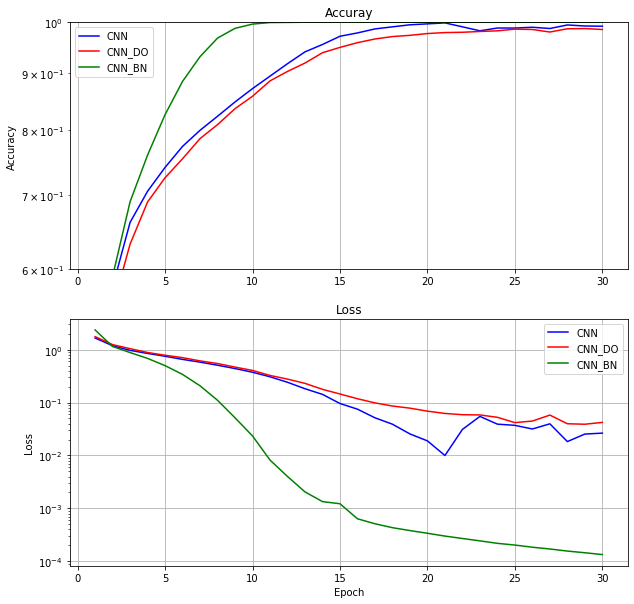

In [17]:
loss = history_basic.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.semilogy(epochs, history_basic.history['acc'], 'b', label='CNN')
plt.semilogy(epochs, history_DO.history['acc'], 'r', label='CNN_DO')
plt.semilogy(epochs, history_BN.history['acc'], 'g', label='CNN_BN')
plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.6, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.semilogy(epochs, history_basic.history['loss'], 'b', label='CNN')
plt.semilogy(epochs, history_DO.history['loss'], 'r', label='CNN_DO')
plt.semilogy(epochs, history_BN.history['loss'], 'g', label='CNN_BN')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 0.6])
plt.legend(loc='best')
plt.show()



## ***실습과제***

### *과제1*

- *dropout과 batch normalization 관련 실험 필요*